# API
## API -> intermediare between two applications, Company shares the data that client want using it, but only the one they want to share

In [12]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

In [8]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'100',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'e418fc49-b062-474f-bc33-d8f6e1435ba3',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-03-15T06:54:10.141Z', 'error_code': 0, 'error_message': None, 'elapsed': 17, 'credit_count': 1, 'notice': None, 'total_count': 9028}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10091, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [9]:
type(data)

dict

In [26]:
import pandas as pd

pd.set_option('display.max_columns',None)

df=pd.json_normalize(data['data'])
df["timestamp"]=pd.to_datetime("now")


/Users/wojtekmarszalek/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


In [22]:
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10091,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.931799e+07,1.931799e+07,NaN,1,NaN,NaN,NaN,2023-03-15T06:52:00.000Z,24891.330821,5.349284e+10,10.7630,0.299369,1.858000,12.998551,13.965647,18.809471,40.289676,4.808506e+11,43.6989,5.227179e+11,NaN,2023-03-15T06:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 07:33:26.255027
1,1027,Ethereum,ETH,ethereum,6576,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,NaN,2023-03-15T06:52:00.000Z,1710.000746,1.595223e+10,8.6191,0.217801,1.749468,10.063088,12.499268,10.052318,32.349384,2.092594e+11,19.0172,2.092594e+11,NaN,2023-03-15T06:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 07:33:26.255027
2,825,Tether,USDT,tether,49387,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.339871e+10,7.314177e+10,NaN,3,NaN,NaN,NaN,2023-03-15T06:52:00.000Z,1.004405,7.441688e+10,11.0220,0.007284,-0.058447,0.440622,0.407645,0.418331,0.426721,7.372204e+10,6.7001,7.346396e+10,NaN,2023-03-15T06:52:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-15 07:33:26.255027
3,1839,BNB,BNB,bnb,1214,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578921e+08,1.599800e+08,NaN,4,NaN,NaN,NaN,2023-03-15T06:52:00.000Z,311.893909,8.430217e+08,-0.2705,-0.079555,1.467327,8.840158,-0.613245,-0.139310,17.549650,4.924559e+10,4.4755,4.989678e+10,NaN,2023-03-15T06:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 07:33:26.255027
4,3408,USD Coin,USDC,usd-coin,10728,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.842625e+10,3.842625e+10,NaN,5,NaN,NaN,NaN,2023-03-15T06:52:00.000Z,0.999152,8.032829e+09,4.7826,0.094056,0.000242,-0.093204,-0.084753,-0.111120,-0.085675,3.839364e+10,3.4901,3.839364e+10,NaN,2023-03-15T06:52:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-15 07:33:26.255027


In [ ]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
  'start':'1',
  'limit':'100',
  'convert':'USD'
    }
    headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'e418fc49-b062-474f-bc33-d8f6e1435ba3',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df=pd.json_normalize(data['data'])
    df["timestamp"]=pd.to_datetime("now")
    df
    
    if not os.path.exists(r"/Users/wojtekmarszalek/Desktop/Osobiste/Nauka/Dane for fun/Python/Portfolio_projects/API.csv"):
        df.to_csv(r"/Users/wojtekmarszalek/Desktop/Osobiste/Nauka/Dane for fun/Python/Portfolio_projects/API.csv",header=True)
    else:
        df.to_csv(r"/Users/wojtekmarszalek/Desktop/Osobiste/Nauka/Dane for fun/Python/Portfolio_projects/API.csv",header=False,mode='a')

In [21]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10091,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.931799e+07,1.931799e+07,NaN,1,NaN,NaN,NaN,2023-03-15T06:52:00.000Z,24891.330821,5.349284e+10,10.7630,0.299369,1.858000,12.998551,13.965647,18.809471,40.289676,4.808506e+11,43.6989,5.227179e+11,NaN,2023-03-15T06:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 07:33:26.255027
1,1027,Ethereum,ETH,ethereum,6576,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,NaN,2023-03-15T06:52:00.000Z,1710.000746,1.595223e+10,8.6191,0.217801,1.749468,10.063088,12.499268,10.052318,32.349384,2.092594e+11,19.0172,2.092594e+11,NaN,2023-03-15T06:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 07:33:26.255027
2,825,Tether,USDT,tether,49387,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.339871e+10,7.314177e+10,NaN,3,NaN,NaN,NaN,2023-03-15T06:52:00.000Z,1.004405,7.441688e+10,11.0220,0.007284,-0.058447,0.440622,0.407645,0.418331,0.426721,7.372204e+10,6.7001,7.346396e+10,NaN,2023-03-15T06:52:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-15 07:33:26.255027
3,1839,BNB,BNB,bnb,1214,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578921e+08,1.599800e+08,NaN,4,NaN,NaN,NaN,2023-03-15T06:52:00.000Z,311.893909,8.430217e+08,-0.2705,-0.079555,1.467327,8.840158,-0.613245,-0.139310,17.549650,4.924559e+10,4.4755,4.989678e+10,NaN,2023-03-15T06:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 07:33:26.255027
4,3408,USD Coin,USDC,usd-coin,10728,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.842625e+10,3.842625e+10,NaN,5,NaN,NaN,NaN,2023-03-15T06:52:00.000Z,0.999152,8.032829e+09,4.7826,0.094056,0.000242,-0.093204,-0.084753,-0.111120,-0.085675,3.839364e+10,3.4901,3.839364e+10,NaN,2023-03-15T06:52:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-15 07:33:26.255027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5899,Casper,CSPR,casper,49,2020-07-21T00:00:00.000Z,"[enterprise-solutions, arrington-xrp-capital-p...",NaN,1.082584e+10,1.156779e+10,NaN,96,NaN,NaN,NaN,2023-03-15T06:52:00.000Z,0.037764,9.595181e+06,14.6884,-0.157731,2.074944,-0.505954,-1.957319,10.703152,27.036500,4.088280e+08,0.0372,4.368470e+08,NaN,2023-03-15T06:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 07:33:26.255027
96,12999,ssv.network,SSV,ssv-network,46,2021-10-22T05:12:07.000Z,[],NaN,1.000000e+07,1.101287e+07,NaN,97,1.107687e+07,4.509173e+08,NaN,2023-03-15T06:52:00.000Z,40.708004,6.674563e+07,-22.9807,-1.732427,6.527758,3.861185,43.903661,167.257391,256.587652,4.070800e+08,0.0370,4.483120e+08,NaN,2023-03-15T06:52:00.000Z,1027.0,Ethereum,ETH,ethereum,0x9D65fF81a3c488d585bBfb0Bfe3c7707c7917f54,2023-03-15 07:33:26.255027
97,7950,Flare,FLR,flare,43,2020-12-11T00:00:00.000Z,[],NaN,1.199999e+10,1.005598e+11,NaN,98,NaN,NaN,NaN,2023-03-15T06:52:00.000Z,0.033526,1.554027e+07,116.1737,0.260166,-0.370528,-4.446476,-15.841980,-24.383999,-57.934978,4.023096e+08,0.0366,3.371350e+09,NaN,2023-03-15T06:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 07:33:26.255027
98,17751,Threshold,T,threshold,73,2022-01-31T08:26:28.000Z,[btc-ecosystem]

In [30]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print("API Runner completed")
    sleep(60)
exit()

{'status': {'timestamp': '2023-03-15T08:39:09.210Z', 'error_code': 0, 'error_message': None, 'elapsed': 19, 'credit_count': 1, 'notice': None, 'total_count': 9031}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10091, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

/Users/wojtekmarszalek/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2023-03-15T08:40:09.920Z', 'error_code': 0, 'error_message': None, 'elapsed': 19, 'credit_count': 1, 'notice': None, 'total_count': 9031}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10091, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

/Users/wojtekmarszalek/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2023-03-15T08:41:10.886Z', 'error_code': 0, 'error_message': None, 'elapsed': 15, 'credit_count': 1, 'notice': None, 'total_count': 9031}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10091, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

/Users/wojtekmarszalek/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


KeyboardInterrupt: 

In [32]:
df72=pd.read_csv(r"/Users/wojtekmarszalek/Desktop/Osobiste/Nauka/Dane for fun/Python/Portfolio_projects/API.csv")
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10091,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.931805e+07,1.931805e+07,NaN,1,NaN,NaN,NaN,2023-03-15T08:37:00.000Z,24893.036759,5.283223e+10,9.6831,-0.022101,2.017207,12.985118,14.150734,18.695400,40.753111,4.808849e+11,43.7583,5.227538e+11,NaN,2023-03-15T08:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 08:39:09.382919
1,1,1027,Ethereum,ETH,ethereum,6576,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,NaN,2023-03-15T08:37:00.000Z,1705.593913,1.567505e+10,7.7419,-0.217121,1.661256,9.680382,12.562415,9.275286,32.305699,2.087201e+11,18.9926,2.087201e+11,NaN,2023-03-15T08:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 08:39:09.382919
2,2,825,Tether,USDT,tether,49389,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,7.339871e+10,7.314177e+10,NaN,3,NaN,NaN,NaN,2023-03-15T08:37:00.000Z,1.004490,7.374012e+10,10.4888,0.028861,-0.087300,0.448987,0.363898,0.427640,0.434670,7.372826e+10,6.7107,7.347016e+10,NaN,2023-03-15T08:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-15 08:39:09.382919
3,3,1839,BNB,BNB,bnb,1214,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.578921e+08,1.599800e+08,NaN,4,NaN,NaN,NaN,2023-03-15T08:37:00.000Z,312.429272,8.343196e+08,2.5916,-0.212035,2.173686,8.961423,4.078091,-0.186687,17.892092,4.933012e+10,4.4917,4.998242e+10,NaN,2023-03-15T08:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 08:39:09.382919
4,4,3408,USD Coin,USDC,usd-coin,10730,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.842625e+10,3.842625e+10,NaN,5,NaN,NaN,NaN,2023-03-15T08:37:00.000Z,0.999477,7.941776e+09,3.9730,0.041687,0.035680,-0.069328,-0.034743,-0.074934,-0.058334,3.840617e+10,3.4974,3.840617e+10,NaN,2023-03-15T08:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-15 08:39:09.382919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,95,5899,Casper,CSPR,casper,49,2020-07-21T00:00:00.000Z,"['enterprise-solutions', 'arrington-xrp-capita...",NaN,1.082603e+10,1.156799e+10,NaN,96,NaN,NaN,NaN,2023-03-15T08:39:00.000Z,0.037514,9.363762e+06,8.2349,-0.235932,2.053173,-0.672173,-0.643110,6.722628,27.770162,4.061326e+08,0.0370,4.339669e+08,NaN,2023-03-15T08:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 08:41:11.139090
296,96,7950,Flare,FLR,flare,43,2020-12-11T00:00:00.000Z,[],NaN,1.199999e+10,1.005598e+11,NaN,97,1.129181e+10,3.777954e+08,NaN,2023-03-15T08:39:00.000Z,0.033457,1.528633e+07,103.8484,0.089777,0.986470,-3.515004,-15.566340,-24.680536,-58.020727,4.014895e+08,0.0366,3.364477e+09,NaN,2023-03-15T08:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 08:41:11.139090
297,97,12999,ssv.network,SSV,ssv-network,46,2021-10-22T05:12:07.000Z,[],NaN,1.000000e+07,1.101287e+07,NaN,98,1.107687e+07,4.422492e+08,NaN,2023-03-15T08:39:00.000Z,39.925464,6.575735e+07,-24.2595,-0.628752,4.681144,0.096704,45.802059,157.831921,255.316194,3.992546e+08,0.0363,4.396940e+08,NaN,2023-03-15T08:39:00.000Z,1027.0,Ethereum,ETH,ethereum,0x9D65fF81a3c488d585bBfb0Bfe3c7707c7917f54,2023-03-15 08:41:11.139090
298,98,17751,Threshold,T,

In [65]:
pd.set_option("display.float_format",lambda x: "%.5f" %x)
pd.set_option('display.max_rows',None)

In [66]:
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10091,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19318050.00000,19318050.00000,NaN,1,NaN,NaN,NaN,2023-03-15T08:37:00.000Z,24893.03676,52832232442.61965,9.68310,-0.02210,2.01721,12.98512,14.15073,18.69540,40.75311,480884928757.32422,43.75830,522753771933.70001,NaN,2023-03-15T08:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 08:39:09.382919
1,1,1027,Ethereum,ETH,ethereum,6576,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,NaN,2023-03-15T08:37:00.000Z,1705.59391,15675054513.12911,7.74190,-0.21712,1.66126,9.68038,12.56242,9.27529,32.30570,208720121383.94263,18.99260,208720121383.94000,NaN,2023-03-15T08:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 08:39:09.382919
2,2,825,Tether,USDT,tether,49389,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,73398710308.37930,73141766321.23428,NaN,3,NaN,NaN,NaN,2023-03-15T08:37:00.000Z,1.00449,73740121922.06239,10.48880,0.02886,-0.08730,0.44899,0.36390,0.42764,0.43467,73728262325.18417,6.71070,73470164688.22000,NaN,2023-03-15T08:37:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-15 08:39:09.382919
3,3,1839,BNB,BNB,bnb,1214,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,157892105.57005,159979963.59043,NaN,4,NaN,NaN,NaN,2023-03-15T08:37:00.000Z,312.42927,834319644.83839,2.59160,-0.21203,2.17369,8.96142,4.07809,-0.18669,17.89209,49330115586.77673,4.49170,49982423547.98000,NaN,2023-03-15T08:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 08:39:09.382919
4,4,3408,USD Coin,USDC,usd-coin,10730,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,38426246452.57087,38426246452.57087,NaN,5,NaN,NaN,NaN,2023-03-15T08:37:00.000Z,0.99948,7941776400.82132,3.97300,0.04169,0.03568,-0.06933,-0.03474,-0.07493,-0.05833,38406167355.12257,3.49740,38406167355.12000,NaN,2023-03-15T08:37:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-15 08:39:09.382919
5,5,52,XRP,XRP,xrp,903,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,50950912949.00000,99989113908.00000,NaN,6,NaN,NaN,NaN,2023-03-15T08:37:00.000Z,0.37408,1399892437.94364,-7.08550,-0.13026,1.18882,-1.09117,0.15394,-7.86712,-1.38485,19059480853.44835,1.73540,37407535508.79000,NaN,2023-03-15T08:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 08:39:09.382919
6,6,2010,Cardano,ADA,cardano,678,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34702211629.56500,35573698990.42300,NaN,7,NaN,NaN,NaN,2023-03-15T08:37:00.000Z,0.34351,630979188.08040,19.58230,-0.28936,0.21784,6.21421,-4.27172,-6.33043,13.83370,11920705655.81126,1.08500,15458143136.17000,NaN,2023-03-15T08:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 08:39:09.382919
7,7,3890,Polygon,MATIC,polygon,611,2019-04-28T00:00:00.000Z,"['platform', 'enterprise-solutions', 'zero-kno...",10000000000.00000,8734317475.28493,10000000000.00000,NaN,8,NaN,NaN,NaN,2023-03-15T08:37:00.000Z,1.22313,965970069.59583,5.04700,-0.19890,5.32341,8.85445,1.51502,20.12692,36.07417,10683194558.82077,0.97210,12231287205.96000,NaN,2023-03-15T08:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-15 08:39:09.382919
8,8

In [38]:
crypto=df[["id","name","cmc_rank","quote.USD.price","quote.USD.percent_change_90d","quote.USD.market_cap_dominance"]]

In [91]:
df3=df72.groupby("name",sort=False)[["quote.USD.percent_change_24h","quote.USD.percent_change_30d","quote.USD.percent_change_60d","quote.USD.percent_change_90d"]].mean()

In [92]:
df4=df3.stack()
df4

name                                            
Bitcoin             quote.USD.percent_change_24h      2.09538
                    quote.USD.percent_change_30d     14.21195
                    quote.USD.percent_change_60d     18.74451
                    quote.USD.percent_change_90d     40.80405
Ethereum            quote.USD.percent_change_24h      1.67612
                    quote.USD.percent_change_30d     12.60744
                    quote.USD.percent_change_60d      9.28230
                    quote.USD.percent_change_90d     32.32177
Tether              quote.USD.percent_change_24h     -0.06516
                    quote.USD.percent_change_30d      0.36122
                    quote.USD.percent_change_60d      0.42206
                    quote.USD.percent_change_90d      0.43006
BNB                 quote.USD.percent_change_24h      2.21190
                    quote.USD.percent_change_30d      4.11556
                    quote.USD.percent_change_60d     -0.15464
                    q

In [94]:
df5=df4.to_frame(name="values")
df5

values
name                                                      
Bitcoin            quote.USD.percent_change_24h    2.09538
                   quote.USD.percent_change_30d   14.21195
                   quote.USD.percent_change_60d   18.74451
                   quote.USD.percent_change_90d   40.80405
Ethereum           quote.USD.percent_change_24h    1.67612
                   quote.USD.percent_change_30d   12.60744
                   quote.USD.percent_change_60d    9.28230
                   quote.USD.percent_change_90d   32.32177
Tether             quote.USD.percent_change_24h   -0.06516
                   quote.USD.percent_change_30d    0.36122
                   quote.USD.percent_change_60d    0.42206
                   quote.USD.percent_change_90d    0.43006
BNB                quote.USD.percent_change_24h    2.21190
                   quote.USD.percent_change_30d    4.11556
                   quote.USD.percent_change_60d   -0.15464
                   quote.USD.percent_change_90d   17.91950
USD Coin           quote.USD.percent_change_24h    0.05069
                   quote.USD.percent_change_30d   -0.04705
                   quote.USD.percent_change_60d   -0.08577
                   quote.USD.percent_change_90d   -0.07336
XRP                quote.USD.percent_change_24h    1.19838
                   quote.USD.percent_change_30d    0.17322
                   quote.USD.percent_change_60d   -7.85858
                   quote.USD.percent_change_90d   -1.37403
Cardano            quote.USD.percent_change_24h    0.24086
                   quote.USD.percent_change_30d   -4.25493
                   quote.USD.percent_change_60d   -6.32526
                   quote.USD.percent_change_90d   13.85323
Polygon            quote.USD.percent_change_24h    5.37865
                   quote.USD.percent_change_30d    1.57085
                   quote.USD.percent_change_60d   20.15623
                   quote.USD.percent_change_90d   36.11842
Dogecoin           quote.USD.percent_change_24h    4.01474
                   quote.USD.percent_change_30d   -9.22344
                   quote.USD.percent_change_60d  -16.20838
                   quote.USD.percent_change_90d  -14.13438
Binance USD        quote.USD.percent_change_24h   -0.14143
                   quote.USD.percent_change_30d    0.06451
                   quote.USD.percent_change_60d    0.02646
                   quote.USD.percent_change_90d    0.01076
Solana             quote.USD.percent_change_24h    5.07785
                   quote.USD.percent_change_30d    1.28492
                   quote.USD.percent_change_60d  -10.97079
                   quote.USD.percent_change_90d   49.55619
Polkadot           quote.USD.percent_change_24h    3.29200
                   quote.USD.percent_change_30d    2.64034
                   quote.USD.percent_change_60d    0.37829
                   quote.USD.percent_change_90d   21.79188
Dai                quote.USD.percent_change_24h   -0.05710
                   quote.USD.percent_change_30d   -0.06864
                   quote.USD.percent_change_60d   -0.20912
                   quote.USD.percent_change_90d   -0.13047
Shiba Inu          quote.USD.percent_change_24h    2.74868
                   quote.USD.percent_change_30d  -11.52863
                   quote.USD.percent_change_60d    3.98282
                   quote.USD.percent_change_90d   26.84408
TRON               quote.USD.percent_change_24h    0.91613
                   quote.USD.percent_change_30d    3.90864
                   quote.USD.percent_change_60d    3.05578
                   quote.USD.percent_change_90d   20.59571
Litecoin           quote.USD.percent_change_24h    3.89200
                   quote.USD.percent_change_30d   -9.42284
                   quote.USD.percent_change_60d   -7.03403
                   quote.USD.percent_change_90d   11.94036
Avalanche          quote.USD.percent_change_24h    5.56745
                   quote.USD.percent_change_30d   -1.46654
                   quote.USD.percent_cha

In [98]:
index=pd.Index(range(400))
df6=df5.reset_index()
df6.set_index(index,inplace=True)

In [99]:
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_24h,2.09538
1,Bitcoin,quote.USD.percent_change_30d,14.21195
2,Bitcoin,quote.USD.percent_change_60d,18.74451
3,Bitcoin,quote.USD.percent_change_90d,40.80405
4,Ethereum,quote.USD.percent_change_24h,1.67612
5,Ethereum,quote.USD.percent_change_30d,12.60744
6,Ethereum,quote.USD.percent_change_60d,9.28230
7,Ethereum,quote.USD.percent_change_90d,32.32177
8,Tether,quote.USD.percent_change_24h,-0.06516
9,Tether,quote.USD.percent_change_30d,0.36122


In [102]:
df6.rename({"level_1":"price_percent_change"},axis=1,inplace=True)d

In [103]:
df6

,name,price_percent_change,values
0,Bitcoin,quote.USD.percent_change_24h,2.09538
1,Bitcoin,quote.USD.percent_change_30d,14.21195
2,Bitcoin,quote.USD.percent_change_60d,18.74451
3,Bitcoin,quote.USD.percent_change_90d,40.80405
4,Ethereum,quote.USD.percent_change_24h,1.67612
5,Ethereum,quote.USD.percent_change_30d,12.60744
6,Ethereum,quote.USD.percent_change_60d,9.28230
7,Ethereum,quote.USD.percent_change_90d,32.32177
8,Tether,quote.USD.percent_change_24h,-0.06516
9,Tether,quote.USD.percent_change_30d,0.36122


In [107]:
df6["price_percent_change"]=df6["price_percent_change"].replace(["quote.USD.percent_change_24h"],["24h"])
df6["price_percent_change"]=df6["price_percent_change"].replace(["quote.USD.percent_change_30d"],["30d"])
df6["price_percent_change"]=df6["price_percent_change"].replace(["quote.USD.percent_change_60d"],["60d"])
df6["price_percent_change"]=df6["price_percent_change"].replace(["quote.USD.percent_change_90d"],["90d"])

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

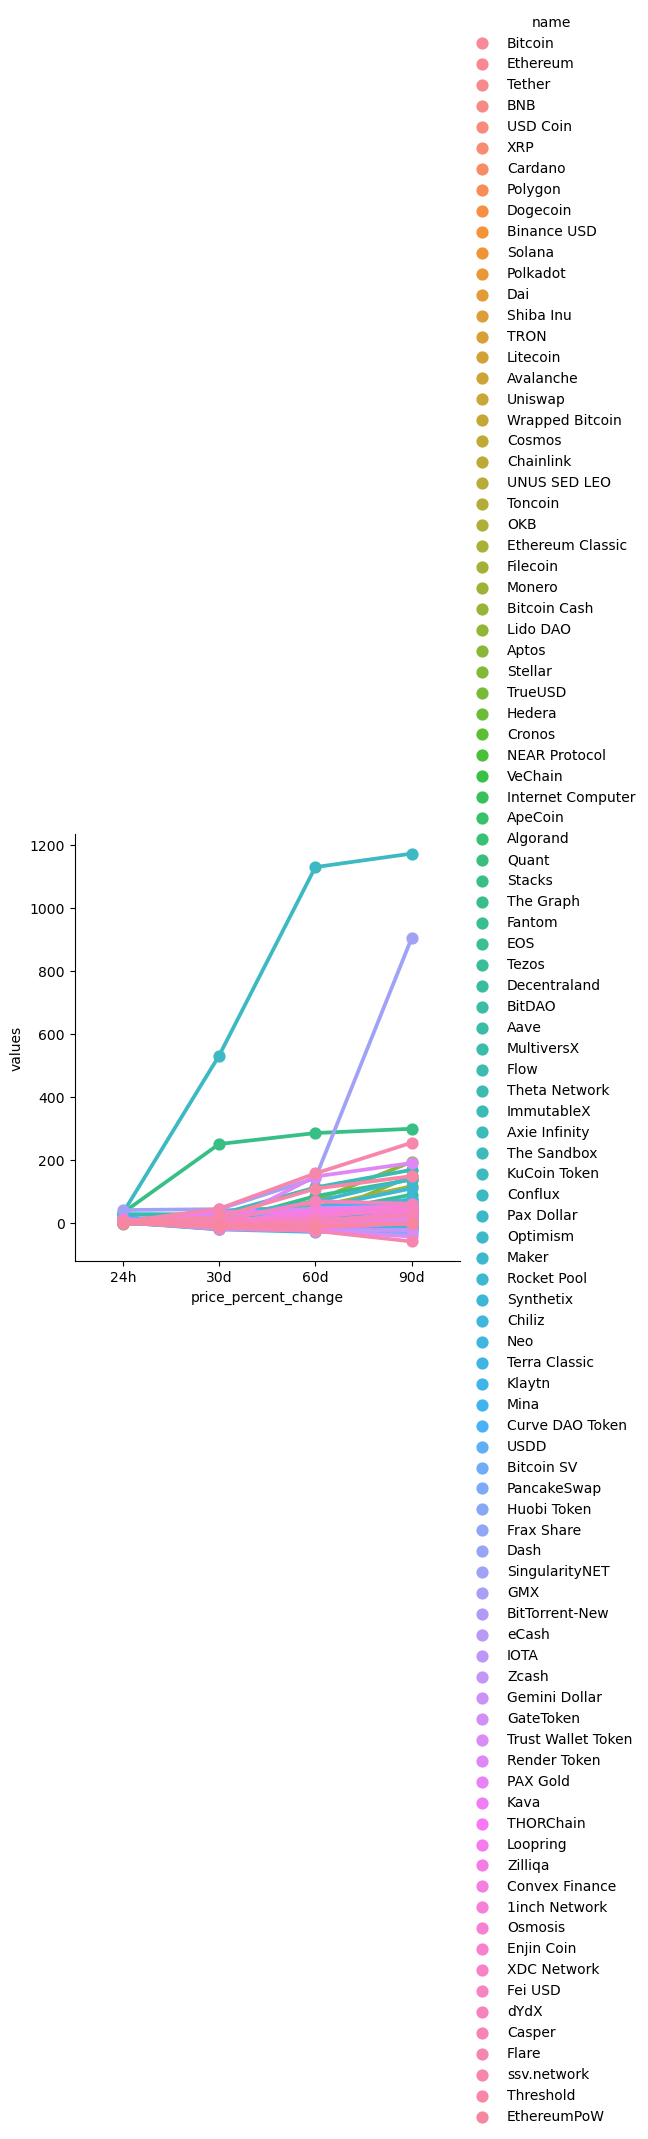

In [108]:
sns.catplot(x="price_percent_change", y="values",hue="name",data=df6,kind="point")

In [126]:
most_growth=df6.groupby("name",sort=False)["values"].mean()

In [129]:
most_growth.sort_values(ascending=False,inplace=True)

In [143]:
top_10_growth=most_growth[:10]
top_10_growth.reset_index()
df_growth=top_10_growth.to_frame(name="values")
df_growth.reset_index(inplace=True)
df_growth

,name,values
0,Conflux,716.77752
1,SingularityNET,283.24992
2,Stacks,217.29503
3,ssv.network,115.82435
4,Render Token,86.09827
5,ImmutableX,84.71569
6,Aptos,71.17607
7,Threshold,70.88625
8,Optimism,59.15166
9,The Graph,58.90565


In [123]:
top_3=df6.loc[(df6["name"]=="Bitcoin") | (df6["name"]=="BNB") | (df6["name"]=="Ethereum")]

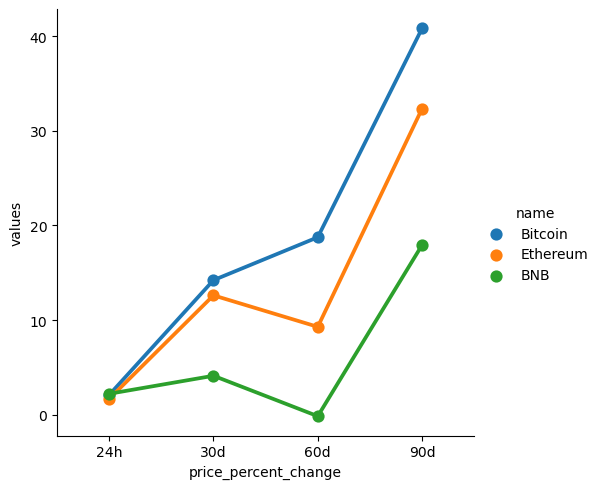

In [124]:
sns.catplot(x="price_percent_change", y="values",hue="name",data=top_3,kind="point")

In [151]:
growth_list=df_growth["name"].tolist()

In [155]:
df_top_growth=df6[df6["name"].isin(growth_list)==True]

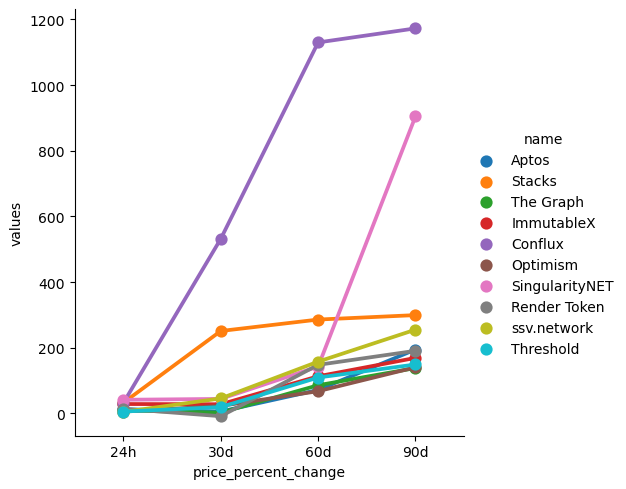

In [157]:
sns.catplot(x="price_percent_change", y="values",hue="name",data=df_top_growth,kind="point")